In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

# !pip install gluonnlp pandas tqdm   
# !pip install mxnet
# !pip install sentencepiece==0.1.91
# !pip install transformers==4.8.2
# !pip install torch ==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=689003 sha256=f778888b0c5b79291133c151d5545e321606b4173fc4aaf80770ce2fbae42245
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [ ]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

In [ ]:
#GPU 사용
# device = torch.device("cuda:0")
device = torch.device("cuda:1")
# device = torch.device("cpu")

In [ ]:
# torch.cuda.is_available()
# torch.rand(10).cuda()
# # export TORCH_CUDA_ARCH_LIST=6.1
# import torch
# import torch.nn as nn
# import torchvision.datasets as dsets

# use_cuda = True
# if use_cuda and torch.cuda.is_available():
#     net.cuda()

tensor([0.6030, 0.5053, 0.8142, 0.0739, 0.6487, 0.1462, 0.1513, 0.7166, 0.9973,
        0.6465], device='cuda:0')

In [ ]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터불러오기
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/refer_data/크롤링이후/clean_total_crawling10.2(1500개씩뽑은데이터).csv', encoding='utf8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24785 entries, 0 to 24784
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index_num    24785 non-null  int64 
 1   reviews      24785 non-null  object
 2   keyword_kor  24785 non-null  object
 3   keyword_num  24785 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 774.7+ KB


In [ ]:
#예시로 10개 뽑아보기
data.head(10)

,index_num,reviews,keyword_kor,keyword_num
0,0,냄새안나고 맛있어요,곱창,1
1,1,부추된장찌개랑 양밥,곱창,1
2,2,곱창과 전골을 추천,곱창,1
3,3,생각만큼은 아니었다,곱창,1
4,4,망원 청어람 볶음밥,곱창,1
5,5,가성비 최고 곱창집,곱창,1
6,6,맛있지만 가격이 셈,곱창,1
7,7,특양구이 대창 갈비,곱창,1
8,8,소곱창구이 황소막창,곱창,1
9,9,곱을 느낄 수 있음,곱창,1


In [ ]:
# sns을 이용한 데이터 시각화
import seaborn as sns
data['keyword_kor'].value_counts()

곱창       1500
아시아음식    1500
한식       1500
타코       1500
중식       1500
전골       1500
양식       1500
스시       1500
분식       1500
베이커리     1500
버거       1500
라멘       1500
디저트      1500
해산물      1500
국수       1474
치킨       1254
돈카츠      1057
Name: keyword_kor, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44273 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_

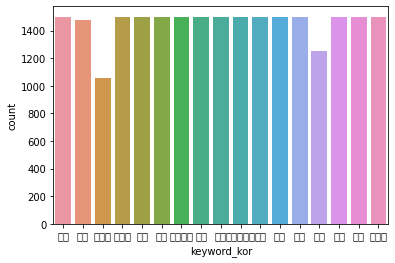

In [ ]:
# 각 클래스별 데이터분포 확인
sns.countplot(data=data, x='keyword_kor')

In [ ]:
# 총 17개의 카테고리를 만들어줌
data.loc[(data['keyword_kor'] == "곱창"), 'keyword_kor'] = 1
data.loc[(data['keyword_kor'] == "국수"), 'keyword_kor'] = 2
data.loc[(data['keyword_kor'] == "돈카츠"), 'keyword_kor'] = 3
data.loc[(data['keyword_kor'] == "디저트"), 'keyword_kor'] = 4
data.loc[(data['keyword_kor'] == "라멘"), 'keyword_kor'] = 5
data.loc[(data['keyword_kor'] == "버거"), 'keyword_kor'] = 6
data.loc[(data['keyword_kor'] == "베이커리"), 'keyword_kor'] = 7
data.loc[(data['keyword_kor'] == "분식"), 'keyword_kor'] = 8
data.loc[(data['keyword_kor'] == "스시"), 'keyword_kor'] = 9
data.loc[(data['keyword_kor'] == "아시아음식"), 'keyword_kor'] = 10
data.loc[(data['keyword_kor'] == "양식"), 'keyword_kor'] = 11
data.loc[(data['keyword_kor'] == "전골"), 'keyword_kor'] = 12
data.loc[(data['keyword_kor'] == "중식"), 'keyword_kor'] = 13
data.loc[(data['keyword_kor'] == "치킨"), 'keyword_kor'] = 14
data.loc[(data['keyword_kor'] == "타코"), 'keyword_kor'] = 15
data.loc[(data['keyword_kor'] == "한식"), 'keyword_kor'] = 16
data.loc[(data['keyword_kor'] == "해산물"), 'keyword_kor'] = 17

In [ ]:
data_list = []
for q, label in zip(data['reviews'], data['keyword_kor'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
print(data_list[0])
print(data_list[6000])
print(data_list[12000])
print(data_list[18000])
print(data_list[24000])
print(data_list[-1])

['냄새안나고 맛있어요', '1']
['미슐랭이라구 해서 기대했는데 면이 너무 많아서인지 금방 물렸다 사이드로 주문한 에비마요가 전맛탱', '5']
['조용한 가게 분위기나 직원분들에게서 전해지는 느낌이 좋아서 기분좋게 식사했습니다 샤리양이 적어서 그랬는지 배부르다고 느끼진 않았습니다', '9']
['어랏 처음엔 그냥 먹었는데 날이 갈수록 맛있어지는 맛집인가보네요 적당히 맵고 새콤 달콤한 오이무침 짱 다른 메뉴들도 슬슬 궁금해지네요 딤섬도 그럭저럭 좋았구요 저랑 간이 잘 맞는 식당이에요', '13']
['서비스최악 기다리는데 안내도 없고 호일위에 음식만 덩그러니 올려놓고 말도 없이감 분위기도 별로 팔에 문신그려진 아저씨들 옴 맛은 왜 특별한지 모르겠는 상상가는 맛 다신안감', '17']
['오포리 근처 숯불구이 장어 전문점인데 장어가 진짜 크고 실하다 숯불에 구워 고소하고 부드러운데 느끼함은 쏙 빠진 장어가 진짜 맛있다 찬은 상당히 간단하고 거의 장어에만 집중하는 곳 아주머니가 잘 구워주시고 둘이 키로에 그람 추가하니 배 부르다 성인 둘이면 일키로만 먹어도 되지만 맛있어서 과식 숯불구이 장어집 중에선 아마도 여기가 가장 낫지 않을까 싶음', '17']


In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

18588
6197


In [ ]:
# BERT 모델에 들어가기 위한 dataset을 만들어주는 클래스
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
#위 코드는 BERT 모델의 토큰화 및 학습에 사용할 파라미터로, 숫자를 조정해도 된다.

max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
# 한편 토큰화 & 패딩을 거치면 데이터는 다음과 같은 형식을 갖게 된다.
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [ ]:
data_train[0]

(array([   2, 1875, 6193, 4207, 7795, 4384, 7096,  517, 5330, 5591, 7018,
        6553, 3924, 2269, 6999, 2623, 5778, 4354, 4955, 5415, 5354, 7096,
        4626, 7217, 7782, 6705, 5439, 1875, 6193, 6896, 1682, 3372, 7096,
         745, 7828, 1022, 6957, 6999, 4299, 5859, 1458, 1967, 7141, 7330,
        3192, 5330, 1698, 1267, 5889, 4128, 5330, 3094, 5439, 3198, 7794,
        1967, 7354, 7139,    3,    1,    1,    1,    1,    1], dtype=int32),
 array(59, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 5)

In [ ]:
# 아래 코드를 실행하여 torch 형식의 dataset을 만들어준다
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# KoBERT 학습모델 만들기
# 학습시킬 KoBERT 모델을 만들어야 하는데, 아래 코드에서 다중분류할 클래스 수 만큼 num_classes 변수를 수정해주어야 한다. 17가지의 class를 분류하기 때문에 17로 입력

## 모델구성

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=18,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
      #valid_length까지만 1, 나머지는 0으로 mask를 생성
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        #pooler는 CLS토큰에 대한 임베딩의 결과, 단순히 첫번째 토큰에 대한 결과가 아니라 문맥을 알아내기 위한 추가 layer를 통과한다.(아마도?)
        #임베딩의 결과에 linear layer를 통과시켜서 classification을 진행한다.
        # print(pooler.shape) batchsize * 768

        #_는 64개(max_length)의 모든 토큰에 대한 임베딩의 결과
        #단어 임베딩을 알고 싶을 때 사용할 수 있다.
        #_의 첫번째 값과 pooler와는 다른 값을 가지고 있는데 pooler는 _의 첫번째 값의 추가적으로 한번더 과정을 거친다.
        #print(_.shape) batchsize * max_len * 768

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out) #batchsize * num_classes

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5) #.to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
# 정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
train_dataloader

In [ ]:
 # KoBERT 모델 학습시키기
  # 학습 데이터셋과 학습 모델 준비가 다 끝났다면 이제 아래 코드 실행을 통해 KoBERT 모델을 학습시켜준다.

## 모델학습 

In [ ]:
from tqdm.notebook import tqdm
train_history=[]
test_history=[]
loss_history=[]

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long() #.to(device)
        segment_ids = segment_ids.long() #.to(device)
        valid_length= valid_length
        label = label.long() #.to(device)
        out = model(token_ids, valid_length, segment_ids)

        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1)) #train_acc 저장
            loss_history.append(loss.data.cpu().numpy())   #train_loss 저장
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long() #.to(device)
        segment_ids = segment_ids.long() #.to(device)
        valid_length= valid_length
        label = label.long() #.to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1)) #test_acc 저장

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
# 모델저장
# 파이토치사용시
from transformers import BertForMaskedLM #파이토치
torch_model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# 모델 클래스 이름.from_pretrained(저장된 디렉토리) 형태
# torch.save(torch_model,f'/content/drive/MyDrive/Colab Notebooks/Save_data/model{model_num}.pt')  # 전체 모델 저장
torch_model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/Save_data/model4.pt') # 파이토치 기반 모델

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# 모델불러오기
from transformers import BertForMaskedLM #파이토치
modelload = BertForMaskedLM.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Save_data/model2(10epochs,train_acc:0.91,test_acc:0.70).pt')

## predict 함수 방법1

In [ ]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    modelload.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long() #.to(device)
        segment_ids = segment_ids.long() #.to(device)

        valid_length= valid_length
        label = label.long() #.to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 1:
                test_eval.append("곱창")
            elif np.argmax(logits) == 2:
                test_eval.append("국수")
            elif np.argmax(logits) == 3:
                test_eval.append("돈카츠")
            elif np.argmax(logits) == 4:
                test_eval.append("디저트")
            elif np.argmax(logits) == 5:
                test_eval.append("라멘")
            elif np.argmax(logits) == 6:
                test_eval.append("버거")
            elif np.argmax(logits) == 7:
                test_eval.append("베이커리")
            elif np.argmax(logits) == 8:
                test_eval.append("분식")
            elif np.argmax(logits) == 9:
                test_eval.append("스시")
            elif np.argmax(logits) == 10:
                test_eval.append("아시아음식")
            elif np.argmax(logits) == 11:
                test_eval.append("양식")
            elif np.argmax(logits) == 12:
                test_eval.append("전골")
            elif np.argmax(logits) == 13:
                test_eval.append("중식")
            elif np.argmax(logits) == 14:
                test_eval.append("치킨")
            elif np.argmax(logits) == 15:
                test_eval.append("타코")
            elif np.argmax(logits) == 16:
                test_eval.append("한식")
            elif np.argmax(logits) == 17:
                test_eval.append("해산물")

        print(">> 입력하신 내용을 종합해 분석결과, " +test_eval[0]+ "이(가) 종류의 음식들은 어떠신가요?.")

In [ ]:
# 새로운 문장 테스트
# 마지막 단계로, 앞에서 훈련시킨 KoBERT 모델에 새로운 문장을 넣어, 분류를 잘 하는지 테스트 해보려고 한다.

# 새로운 문장 역시 토크화 과정을 시켜줌

In [ ]:
predict('남부 유럽의 전통적인 특색을 살리면서도 너무 자극적이지 않은 음식이 생각납니다. 해안 음식이 들어가지 않고 육지 음식이 메인이면서도 너무 묵직하지 않고 가벼운 느낌이 나면 좋을 것 같아요. 유럽 특유의 향신료가 가볍게 들어가는 것은 좋지만 너무 진하여 음식 본유의 맛이 깨지지 않는 음식으로 부탁합니다.')

>> 입력하신 내용을 종합해 분석결과, 타코이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('돼지고기 육즙이 가득하고 풍미가 좋으며 신선한 야채들과 고소한 빵과 탄산과 함께 즐기면 좋을만한 음식이 먹고싶군요')

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('친구랑 촉촉하고 후루룩먹을 수 있는거 먹고싶어')

>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('입에 넣어서 씹자마자 육즙이 팡팡터지고 씹으면 씹을수록 고소함과 감치맛을 느낄수 있는 음식이 먹고싶어요')

>> 입력하신 내용을 종합해 분석결과, 치킨이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('어제 문제를 해결하지 못하여 몹시 지쳤을 때 기운을 낼 수 있을 정도로 든든하고 푸짐하며 얼큰한 음식을 먹고 싶어요')

>> 입력하신 내용을 종합해 분석결과, 스시이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('시원하고 적당한 음식')

>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
predict('다음 주에 진행할 프로젝트에서 떨지 않을 수 있을 정도로 감동적인 음식을 먹고 싶어요')

>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 종류의 음식들은 어떠신가요?.


In [ ]:
#질문 무한반복하기! 0 입력시 종료
end = 1
while end == 1 :
    sentence = input("생각나는 키워들을 입력하세요.: ")
    if sentence == 0 :
        break
    predict(sentence)
    print("\n")

생각나는 키워들을 입력하세요.: 여자친구랑 데이트할 때 먹을 음식
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 매콤하고 칼칼한음식 추천해줘
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 매운음식
>> 입력하신 내용을 종합해 분석결과, 곱창이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 해장하기 좋은 음식추천해줘
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 맛있는음식 추천해줘
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 코딩할때 먹을 음식 추천해줘
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.


생각나는 키워들을 입력하세요.: 한식이 먹고싶어
>> 입력하신 내용을 종합해 분석결과, 디저트이(가) 가장 적합하다고 생각됩니다.




KeyboardInterrupt: ignored

## predict 함수 방법2

In [ ]:
def softmax(vals, idx):
    valscpu = vals.cpu().detach().squeeze(0)
    a = 0
    for i in valscpu:
        a += np.exp(i)
    return ((np.exp(valscpu[idx]))/a).item() * 100

In [ ]:
# cate = ["정치","경제","사회", "생활/문화","세계","기술/IT", "연예", "스포츠"]
# tmp = ["아이패드 프로에 m1칩 탑재"]
# transform = nlp.data.BERTSentenceTransform(tok, max_len, pad=True, pair=False)
# tokenized = transform(tmp)

# result = model(torch.tensor([tokenized[0]]).to(device), [tokenized[1]], torch.tensor(tokenized[2]).to(device))
# idx = result.argmax().cpu().item()
# print("뉴스의 카테고리는:", cate[idx])
# print("신뢰도는:", "{:.2f}%".format(softmax(result,idx)))

In [ ]:
# torch.save(model.state_dict(), "news.pt")
# modelload = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
# modelload.load_state_dict(torch.load("news.pt", device))
# modelload.eval()

In [ ]:
def testModel(model, seq):
    cate = ["곱창","국수","돈카츠", "디저트","라멘","버거", "베이커리", "분식", "스시", "아시아음식", "양식", "전골", "중식", "치킨", "타코", "한식", "해산물"]
    tmp = [seq]
    transform = nlp.data.BERTSentenceTransform(tok, max_len, pad=True, pair=False)
    tokenized = transform(tmp)

    modelload.eval()
    # result = model(torch.tensor([tokenized[0]]).to(device), [tokenized[1]], torch.tensor(tokenized[2]).to(device))
    result = model(torch.tensor([tokenized[0]]), [tokenized[1]], [tokenized[1]])
    idx = result.argmax().cpu().item()
    print("뉴스의 카테고리는:", cate[idx])
    print("신뢰도는:", "{:.2f}%".format(softmax(result,idx)))


In [ ]:
testModel(model, "쫀득하고 탱탱한 면빨이 있는 음식추천해줘")

AttributeError: ignored

In [ ]:
def softmax(vals, idx):
    valscpu = vals.cpu().detach().squeeze(0)
    a = 0
    for i in valscpu:
        a += np.exp(i)
    return ((np.exp(valscpu[idx]))/a).item() * 100